@Author: Bhupinder Singh

@Date: 07-03-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 10-03-2023

@Title: Object Detection using YOLO v8 on custom dataset.

Installing ultralytics Package to import YOLO V8 model.

In [5]:
!pip install ultralytics==8.0.20

from IPython import display 
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.4/78.2 GB disk)


In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

Mount google drive


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change current directory to model main folder directory

In [10]:
%cd /content/drive/MyDrive/Object-Detection Using Custom Yolo V8 Model

/content/drive/MyDrive/Object-Detection Using Custom Yolo V8 Model


### Training the model on custom dataset.

In [ ]:
%cd /content/drive/MyDrive/Object-Detection Using Custom Yolo V8 Model

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/Object-Detection Using Custom Yolo V8 Model
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa

In [ ]:
!ls runs/detect/train/

args.yaml					     train_batch0.jpg
confusion_matrix.png				     train_batch120.jpg
events.out.tfevents.1678353497.3c3e90f765f2.11764.0  train_batch121.jpg
F1_curve.png					     train_batch122.jpg
P_curve.png					     train_batch1.jpg
PR_curve.png					     train_batch2.jpg
R_curve.png					     val_batch0_labels.jpg
results.csv					     val_batch0_pred.jpg
results.png					     weights


### Confusion Matrix


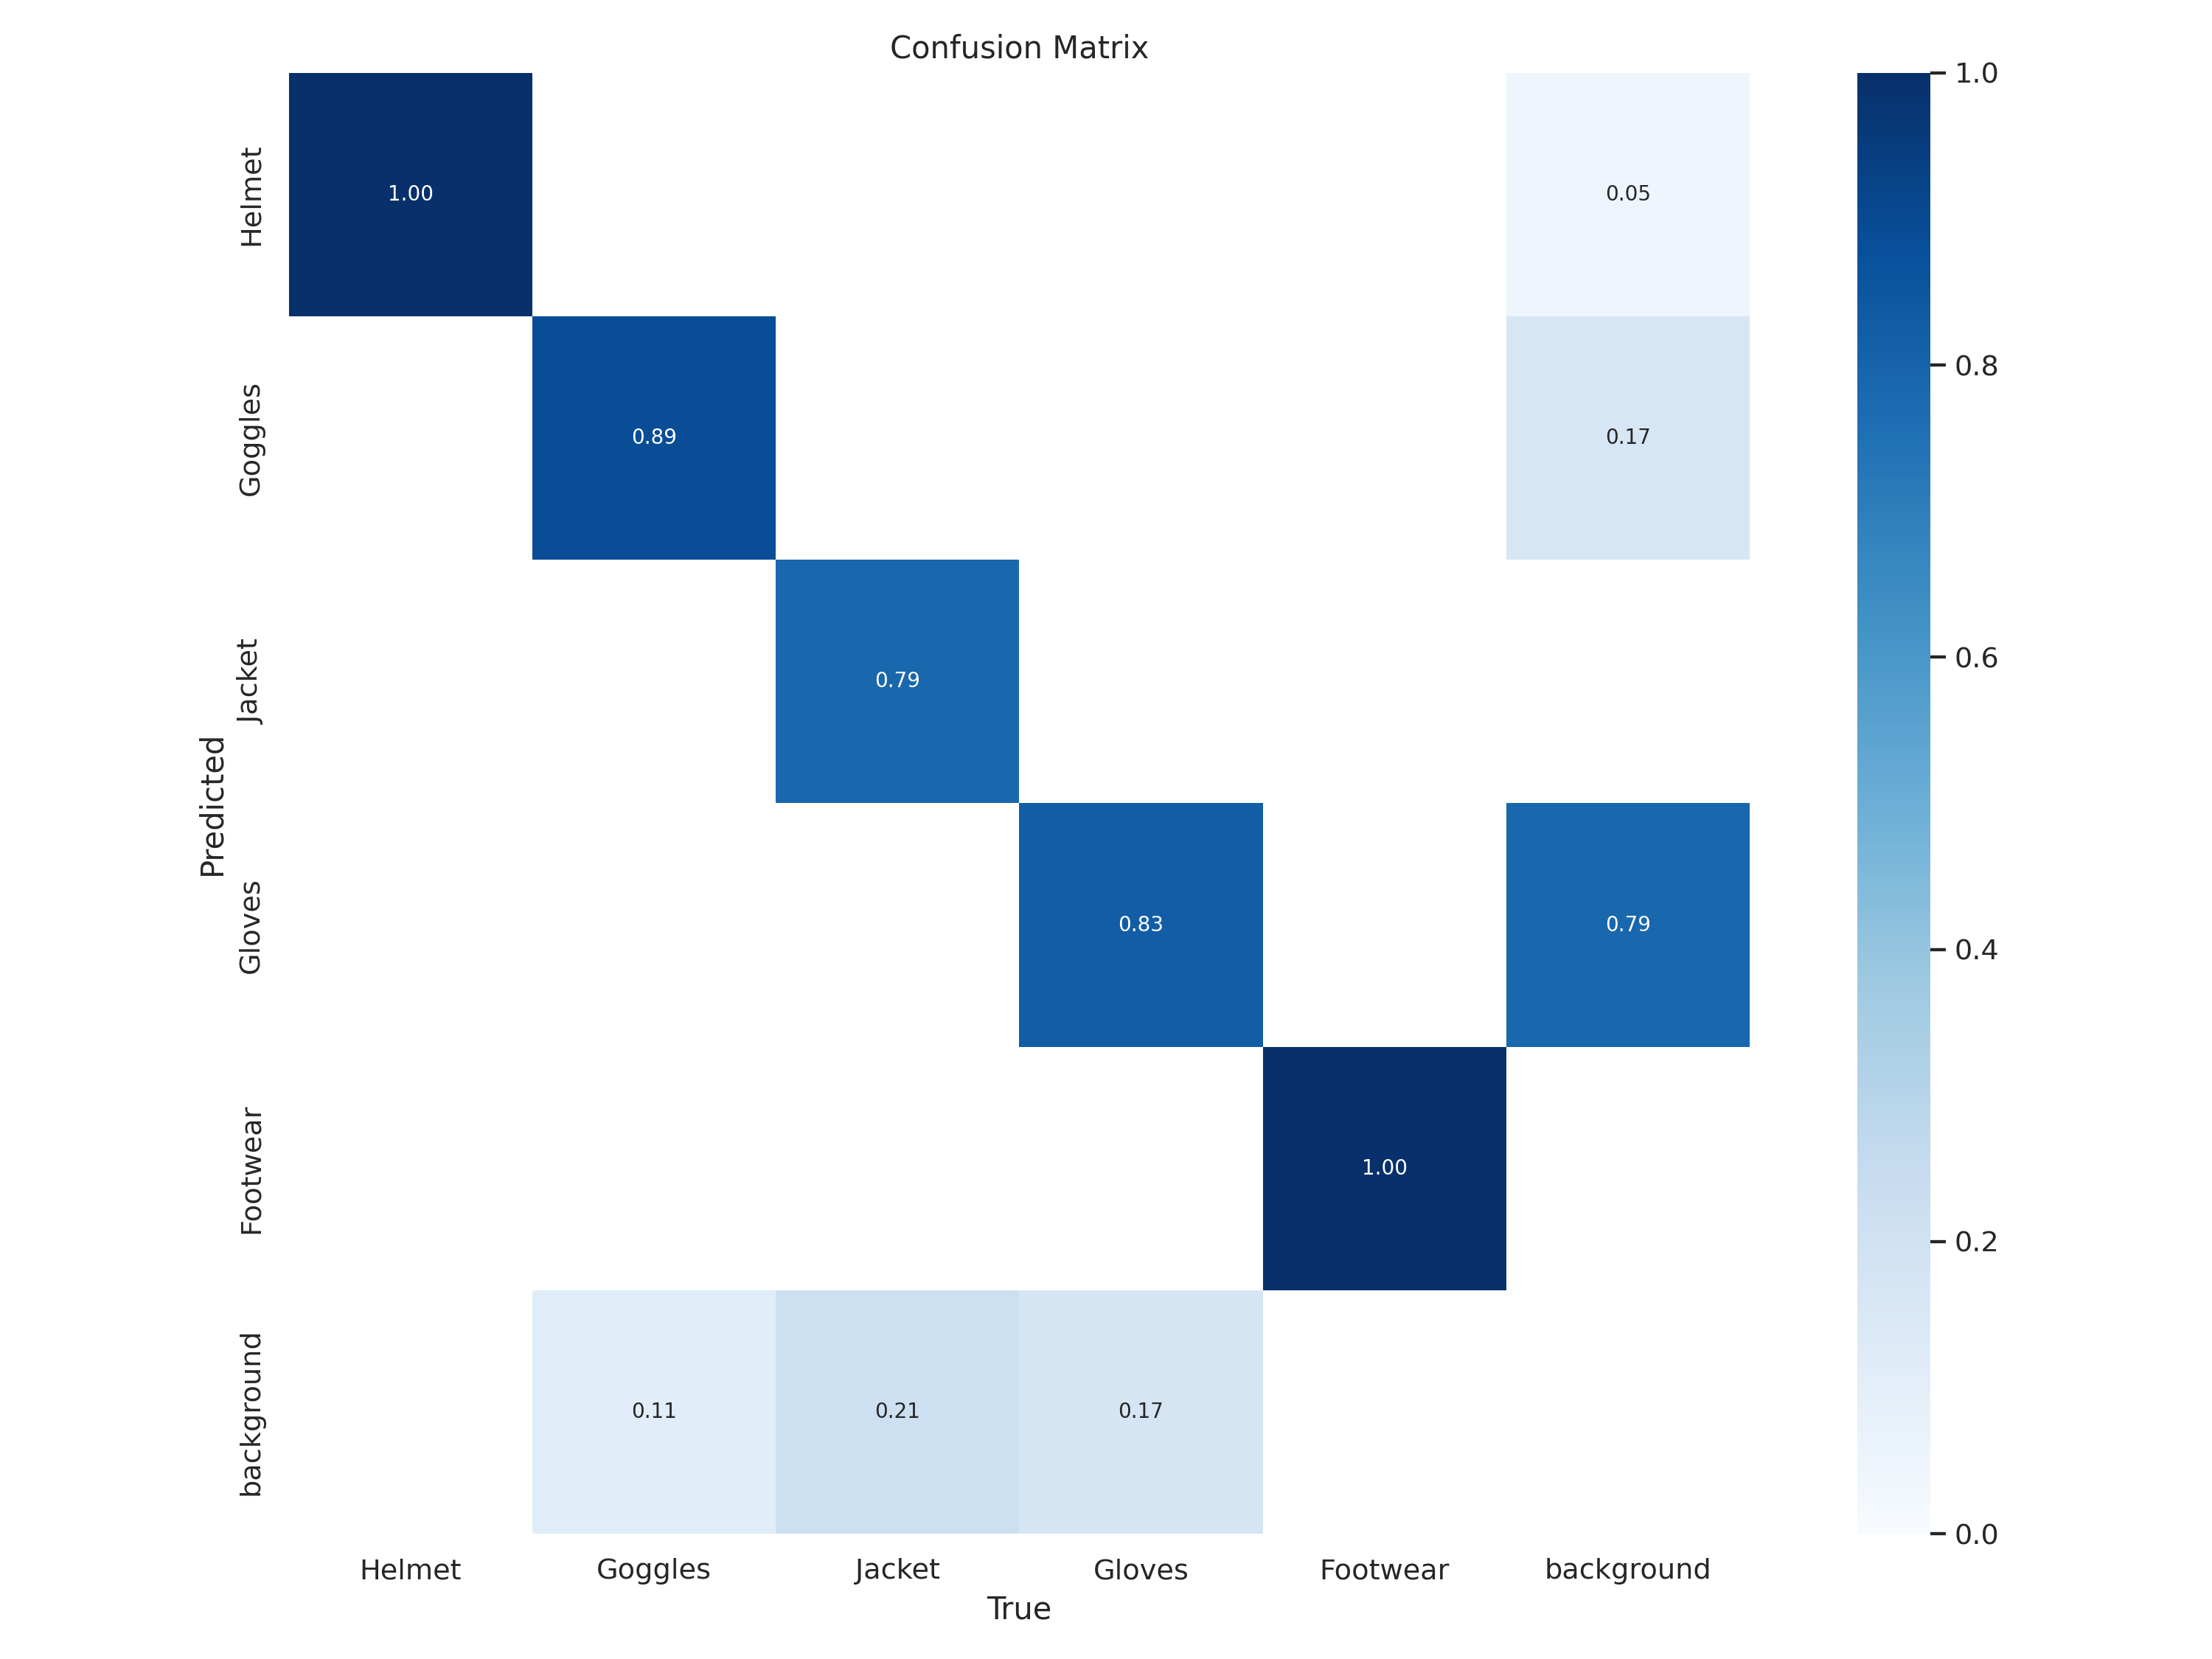

In [ ]:
Image(filename='runs/detect/train/confusion_matrix.png', width=600)

### Performance Metrices plots

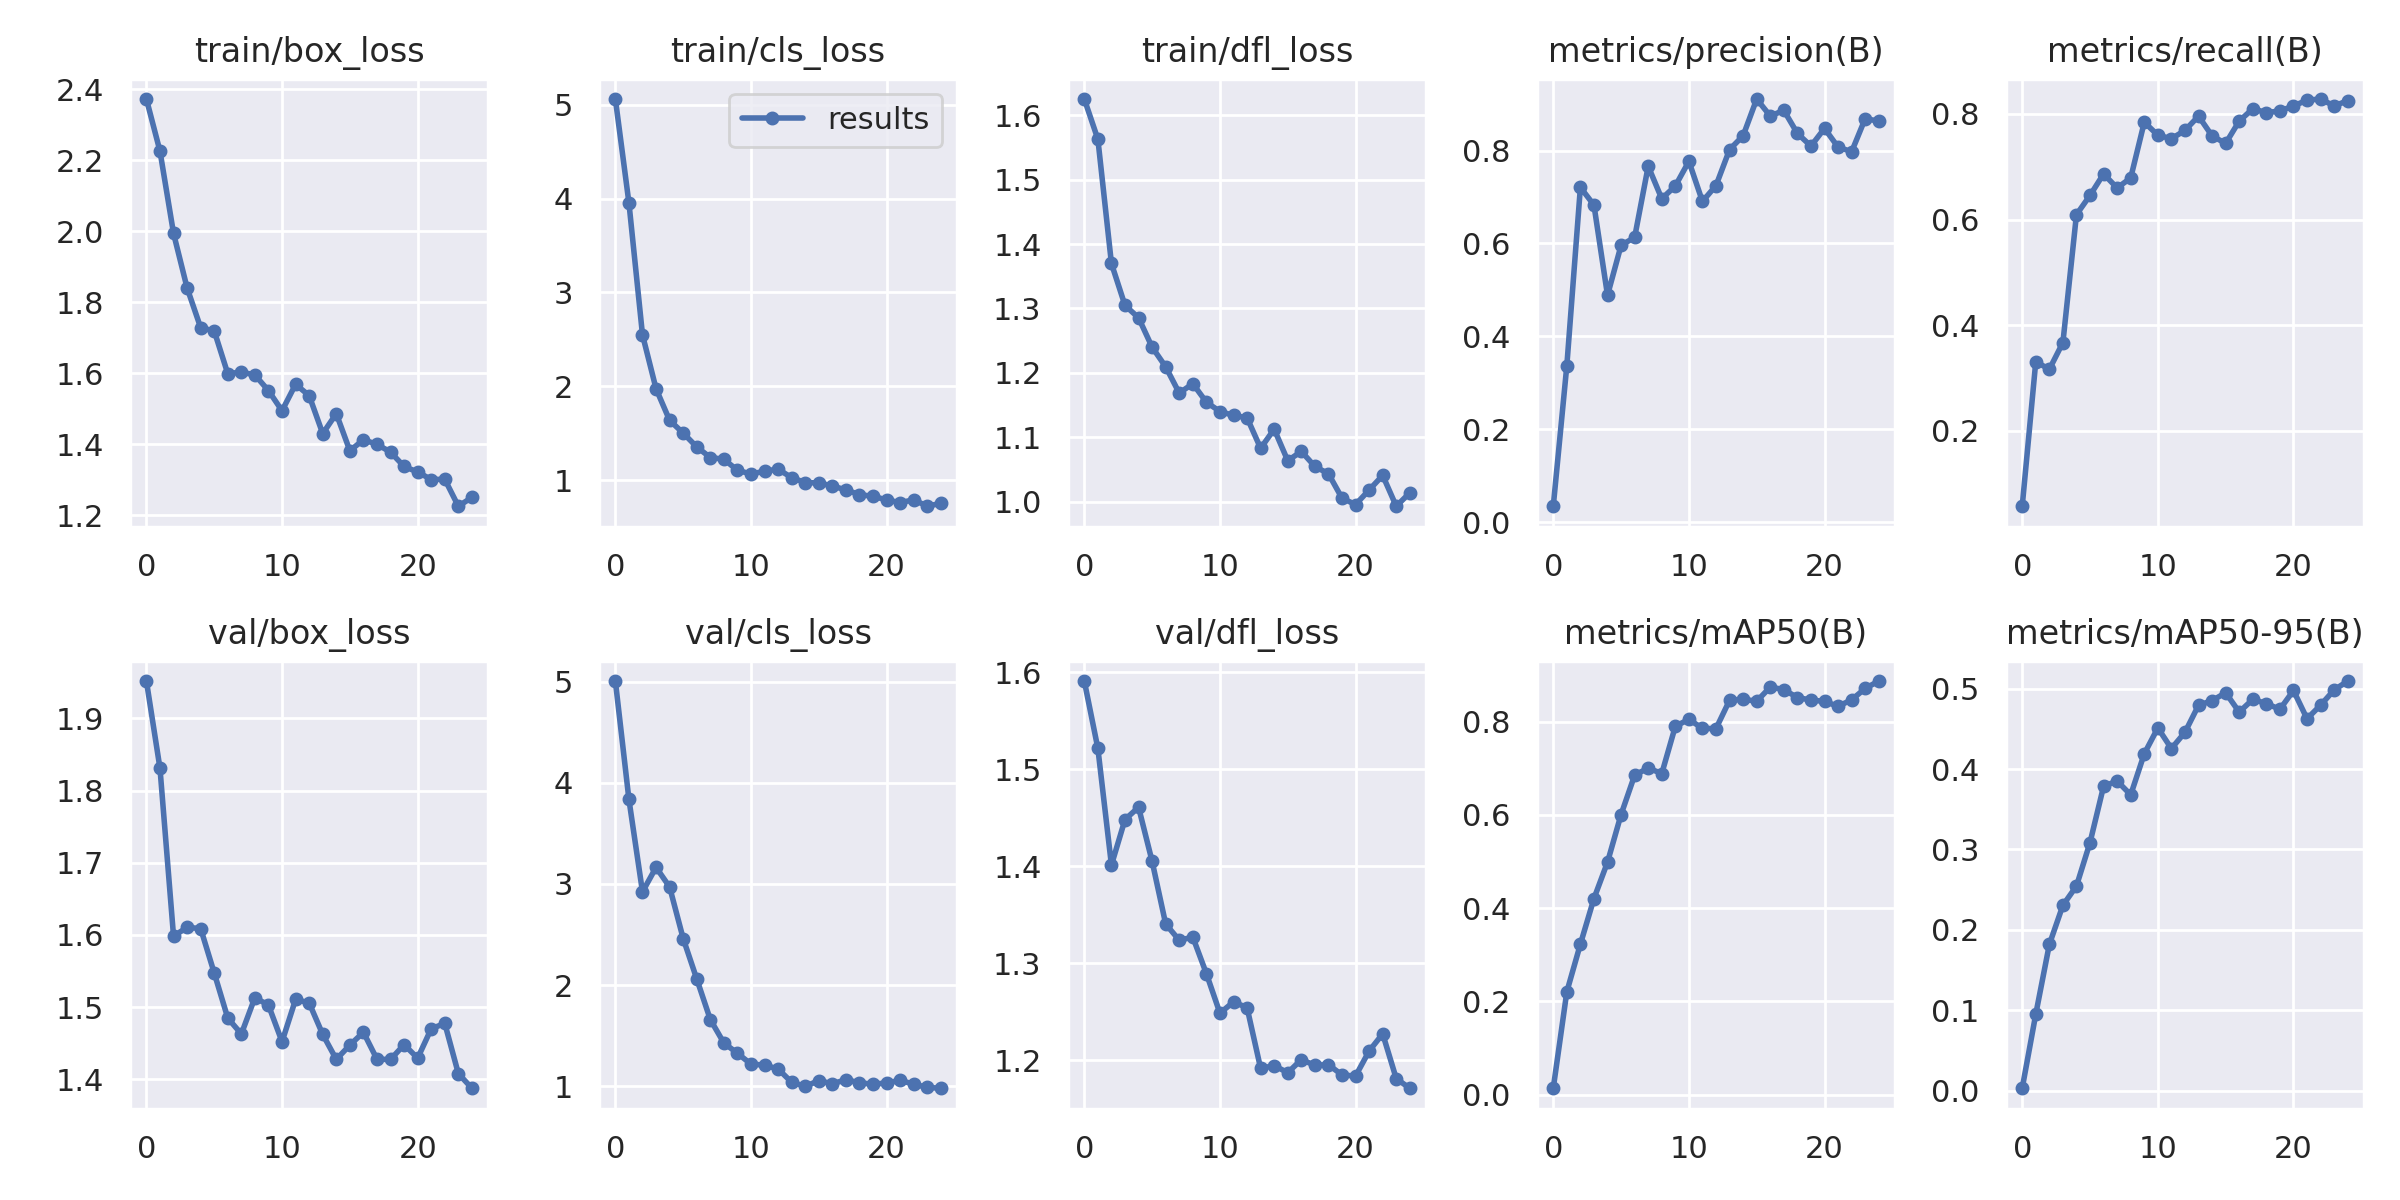

In [ ]:
Image(filename='runs/detect/train/results.png', width=600)

### Some results from training dataset


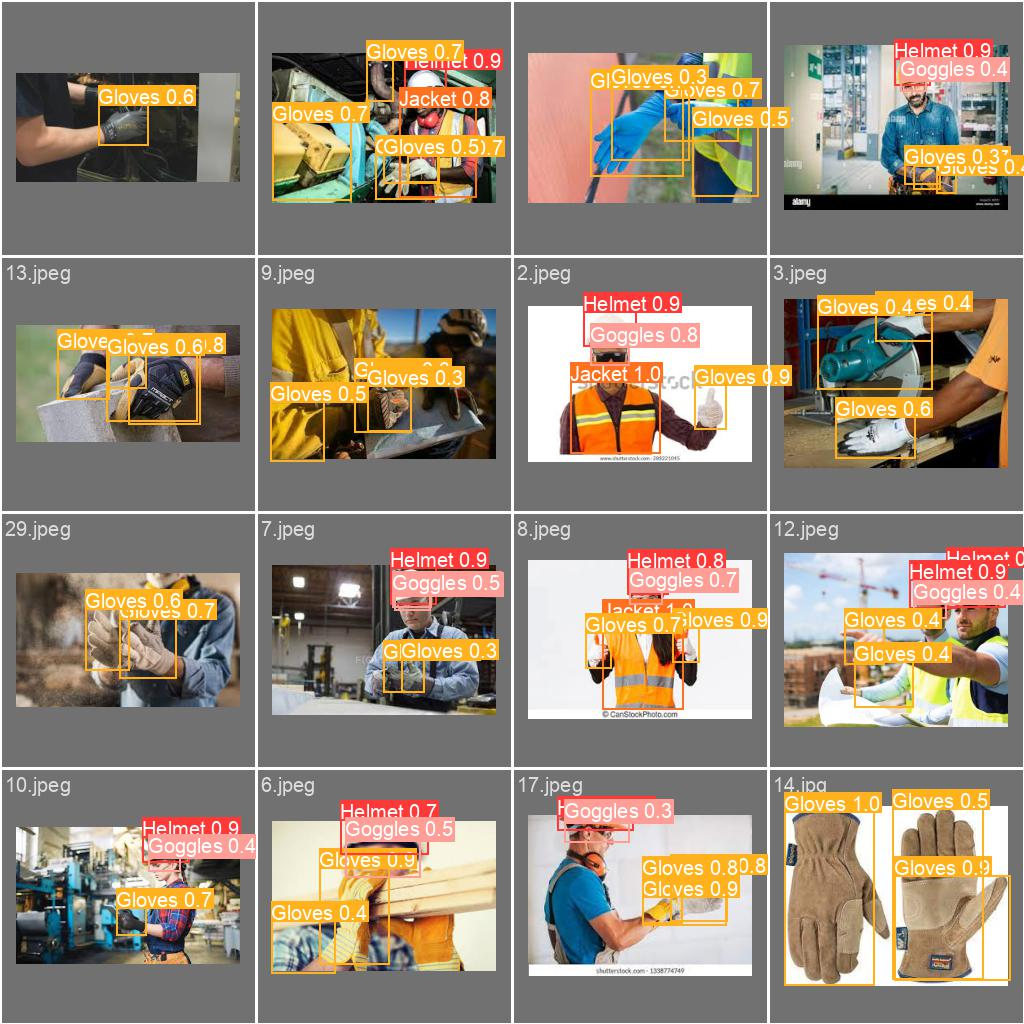

In [ ]:
Image(filename='runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Object-Detection Using Custom Yolo V8 Model/data/test/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.64it/s]
                   all         31        101      0.892      0.821      0.859      0.504
                Helmet         31         18      0.972          1      0.995      0.693
               Goggles         31          9      0.834      0.667       0.69      0.327
                Jacket         31         14      0.945      0.786      0.874      0.646
                Gloves         31         52      0.726      0.654      0.743      0.401
              Footwear         31          8      0.981          1      0.995      0.454
Sp

## Testing Custom Model

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.45 source=data/test/images save = True

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs
image 1/31 /content/drive/MyDrive/Object-Detection Using Custom Yolo V8 Model/data/test/images/1.jpeg: 192x224 2 Goggless, 3 Glovess, 21.6ms
image 2/31 /content/drive/MyDrive/Object-Detection Using Custom Yolo V8 Model/data/test/images/10.jpeg: 160x224 2 Glovess, 14.3ms
image 3/31 /content/drive/MyDrive/Object-Detection Using Custom Yolo V8 Model/data/test/images/11.jpeg: 224x224 3 Glovess, 10.5ms
image 4/31 /content/drive/MyDrive/Object-Detection Using Custom Yolo V8 Model/data/test/images/12.jpeg: 192x224 3 Glovess, 10.4ms
image 5/31 /content/drive/MyDrive/Object-Detection Using Custom Yolo V8 Model/data/test/images/13.jpeg: 128x224 1 Gloves, 14.7ms
image 6/31 /content/drive/MyDrive/Object-Detection Using Custom Yolo V8 Model/data/test/images/14(1).jpeg: 224x224 12.4ms
image 7/31 /content/drive/MyDrive/Object-Detection

**NOTE:** Let's take a look at few results.

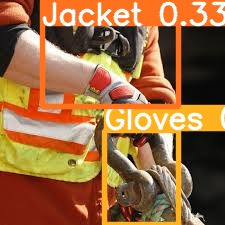

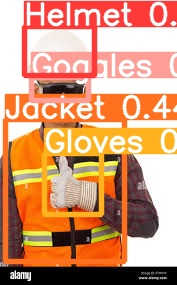

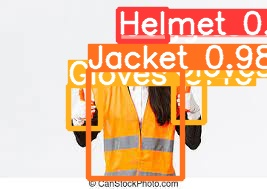

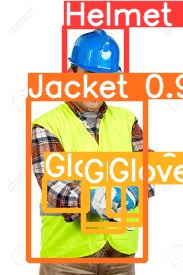

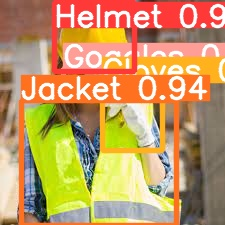

In [11]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpeg')[6:11]:
      display(Image(filename=image_path, width=600))
      print("\n")